# Data Analysis for Data-Driven Water Temperature Prediction 

- Analysing the dataset created by run_example.sh
- Modelling statistical predictions by linear regression

Comparing learners based on different locations for other swimming sites

In [2]:
import pandas as pd 
import datetime
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.dates as mdates
mydates = mdates.DateFormatter('%m-%d')

## Reading and Preprocessing data set 

In [3]:
# Read the example data
data1 = pd.read_csv("dataset_sorenga.csv")

data1["time"] = pd.to_datetime(data1["time"])
data1 = data1.set_index("time")

In [4]:
# TEMP!!! 
# hard coded hand pick for test and train!

# Split in train and test data
# where the full last year becomes the test set 
start_train = datetime.datetime.strptime("2021-01-01T00:00 +0000", "%Y-%m-%dT%H:%M %z")
end_train = datetime.datetime.strptime("2021-12-31T23:59 +0000", "%Y-%m-%dT%H:%M %z")
train = data1[start_train : end_train]

start_test = datetime.datetime.strptime("2020-01-01T00:00 +0000", "%Y-%m-%dT%H:%M %z")
end_test = datetime.datetime.strptime("2020-12-31T23:59 +0000", "%Y-%m-%dT%H:%M %z")
test = data1[start_test : end_test]

## Data Analysis

Learning a data-driven predictor

In [15]:
def plot_test_vs_truth(predicition, test):
    """Plotting timeseries of the prediciton against the truth"""
    fig, axs = plt.subplots(1,2)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    # Time series plot
    axs[0].plot(test["water_temp"].index, test["water_temp"])
    axs[0].plot(test["water_temp"].index, prediction)


    axs[0].legend(["truth","prediction"])
    axs[0].set_xlabel("date")
    axs[0].set_ylabel("water_temp [degC]")
    axs[0].set_title("True time series vs predicted on test set")
    axs[0].tick_params(axis='x', rotation=45)

    # Bias plot
    axs[1].plot(prediction, test["water_temp"], "+")
    axs[1].plot(np.linspace(8,24), np.linspace(8,24))

    axs[1].set_xlabel("predicted water_temp [degC]")
    axs[1].set_ylabel("true water_temp [degC]")
    axs[1].set_title("Predicted test vs true test")    


### Regressoion-Type Algorithms

The atmospheric observations at time $t$, the NorKyst800 forecast for time $t$ and the `water_temp` at time $t-1$ are used as covariates in order to model the `water_temp` at time $t$ as response.

NOTE: 
- the increments between times is different! An additional time difference variable could be useful, but does not make sense additive linear factor (as multiplicative factor maybe more suited - DISCUSS)
- in further work, we aim for atmospheric observations at time $t-1$ and forecasted atmospheric elements at time $t$

In [6]:
clean_data = data1.dropna()
clean_train = clean_data[start_train : end_train]
clean_test  = clean_data[start_test  : end_test ]

In [7]:
# Covariates and response
X = clean_train.loc[:, data1.columns!="water_temp"]
Y = clean_train["water_temp"]

#### Linear Regression

Training a learner by linear regression


In [8]:
from sklearn.linear_model import LinearRegression

# Train linear regression model
linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression()

Verifying on new dataset from other location

In [10]:
# Read the example data
data2 = pd.read_csv("dataset_sjostrand.csv")

data2["time"] = pd.to_datetime(data2["time"])
data2 = data2.set_index("time")

data2 = data2.dropna()

In [11]:
# Test model
prediction_labels = linreg.predict(data2.loc[:, data2.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = data2.index
prediction = prediction.set_index("time")

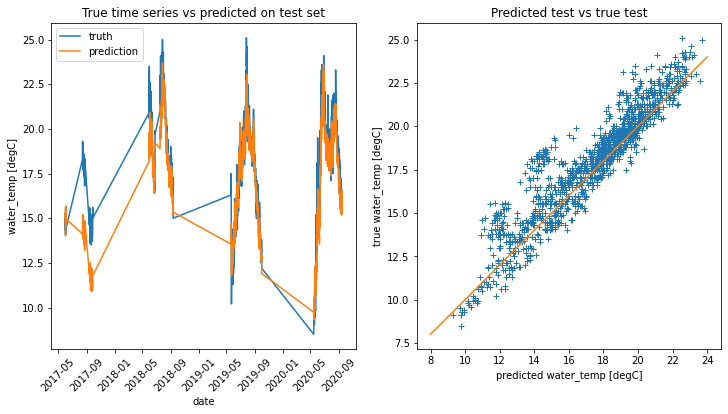

In [16]:
plot_test_vs_truth(prediction, data2)

In [19]:
data_extended = data1
data_extended["LASTwater_temp"] = data_extended["water_temp"].shift(1)
clean_data_extended = data1.dropna()
clean_train_extended = clean_data_extended[start_train : end_train]
clean_test_extended  = clean_data_extended[start_test  : end_test ]

# Covariates and response
X_extended = clean_train_extended.loc[:, data_extended.columns!="water_temp"]
Y_extended = clean_train_extended["water_temp"]

# Train linear regression model
linreg_extended = LinearRegression()
linreg_extended.fit(X_extended,Y_extended)

# Test model
prediction_labels_extended = linreg_extended.predict(data2.loc[:, data2.columns!="water_temp"])
prediction_extended = pd.DataFrame(prediction_labels_extended)
prediction_extended["time"] = data2.index
prediction_extended = prediction_extended.set_index("time")

plot_test_vs_truth(prediction_extended, data2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

In [20]:
data2

,water_temp,norkyst_water_temp,air_temperature_2m,wind_speed_10m,cloud_area_fraction,integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time
time,,,,,,
2017-05-31 10:00:00+00:00,14.1,15.339999,291.60757,3.360324,0.672699,2510595.50
2017-05-31 13:00:00+00:00,15.1,15.599999,292.00555,3.574577,0.659424,2858817.00
2017-05-31 16:00:00+00:00,14.8,15.589999,290.40347,3.904463,0.200562,2015017.50
2017-06-01 07:00:00+00:00,14.3,14.559999,287.52264,2.118806,0.666077,1333952.60
2017-06-01 10:00:00+00:00,15.0,14.990000,290.44302,2.129867,0.655426,2749160.50
...,...,...,...,...,...,...
2020-09-14 08:00:00+00:00,15.6,15.719999,289.05190,1.263765,0.062286,984192.44
2020-09-14 10:00:00+00:00,15.7,15.889999,294.39860,1.708209,0.018890,1863516.50
2020-09-14 13:00:00+00:00,16.0,16.260000,296.61224,1.929557,0.000000,2178379.50


In [29]:
pd.concat([pd.DataFrame(X_extended.columns),pd.DataFrame(np.transpose(linreg_extended.coef_))], axis = 1)

,0,0
0,norkyst_water_temp,3.653472e-02
1,air_temperature_2m,2.092807e-03
2,wind_speed_10m,-1.186834e-03
3,cloud_area_fraction,2.128149e-02
4,integral_of_surface_downwelling_shortwave_flux...,4.230881e-08
5,LASTwater_temp,9.598176e-01


#### Random Forest

We use all default settings (`n_ensembles` aka the number of trees = 100, `max_features` aka the number of features to split on = sqrt(n_features))

In [27]:
from sklearn.ensemble import RandomForestRegressor
# train model
rf = RandomForestRegressor()
rf.fit(X,Y)

RandomForestRegressor()

In [30]:
# Test model
prediction_labels = rf.predict(clean_test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = clean_test.index
prediction = prediction.set_index("time")

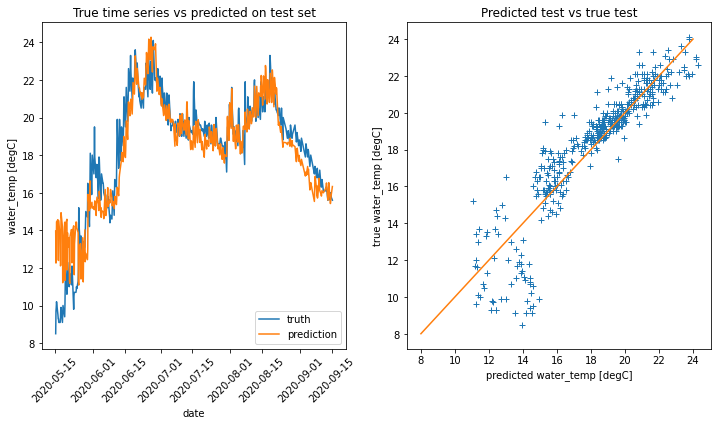

In [32]:
plot_test_vs_truth(prediction, dropna=False)

In [33]:
importance_values = rf.feature_importances_
importance = pd.DataFrame(importance_values, columns=["importance"])
importance["element"] = X.columns
importance = importance.set_index("element")
importance = importance.sort_values(by="importance", ascending=False)
importance

,importance
element,
norkyst_water_temp,0.897982
air_temperature_2m,0.033724
integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time,0.026724
wind_speed_10m,0.025589
cloud_area_fraction,0.015981


#### XGBoost

Using only default, however parameter tuning would be important for boosting though.


In [34]:
from xgboost import XGBRegressor
# train model
xgb = XGBRegressor()
xgb.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
# Test model
prediction_labels = xgb.predict(clean_test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = clean_test.index
prediction = prediction.set_index("time")

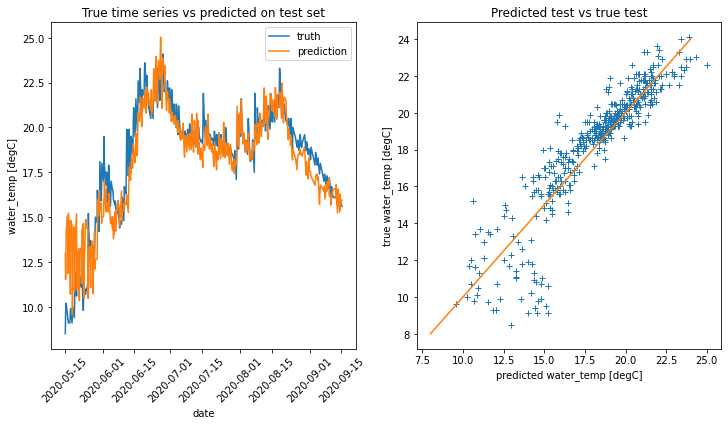

In [38]:
plot_test_vs_truth(prediction, dropna=False)

### Neural Nets

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# NOTE: without a normalizer the results are shifted
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X))

# Building the neural net
# NOTE: The design of the net has major influence on the results!
# For details see documentation of tensorflow
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(10, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(5),
    layers.Dense(units=1)
])

# Configuring with loss function and optimization algorithm
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# Training
# NOTE: The training results are very random such that the results from every run are fundamentally different
model.fit(X, Y,
    epochs=200,
    verbose=0,
    validation_split = 0.2)

In [26]:
#test
prediction_labels = model.predict(test.loc[:, data.columns!="water_temp"])
prediction = pd.DataFrame(prediction_labels)
prediction["time"] = test.index
prediction = prediction.set_index("time")

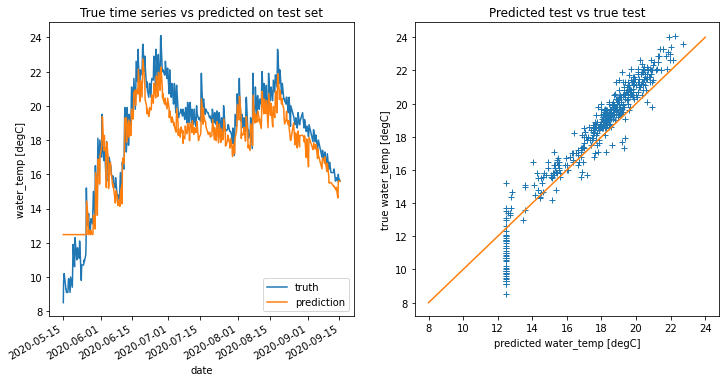

In [27]:
plot_test_vs_truth(prediction)